# Data preprocess

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift

from fSIM_func import *

from IPython import display
import pickle
import glob
from PIL import Image


%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use(['dark_background'])


In [2]:
# Experimental parameters

lambda_f = 0.605           # fluorescence wavelength
mag = 5                   # system magnification
pscrop = 5.5/mag           # effective pixel size on camera plane
NA_obj = 0.1               # Objective NA
Ns = 100                   # data cropping y size
Ms = 100                   # data cropping x size
bg = 300                   # Background noise
upsamp_factor = 4          # upsampling factor (should upsample to Nyquist of expected resolution)


# cropping starting point of fluorescent/coherent images
nstart =  [108 + 550, 60 + 610]  # [cam_pos + crop_pos]
nstart_c = [34 + 550, 16 + 610] # [cam_pos + crop_pos]

In [3]:
# File sorting helper function

import re
numbers = re.compile(r'(\d+)')

def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts


In [4]:
# Load raw fluorescent images from the folder
filedir_fl = '/media/hugespace/Li-Hao/cSIM/data/data_035/scmos_image2/*tif'
files_fl = sorted(glob.glob(filedir_fl), key=numericalSort)

filedir_c = '/media/hugespace/Li-Hao/cSIM/data/data_035/data_image2/ptgrey1_acq*.tif'
files_c = sorted(glob.glob(filedir_c), key=numericalSort)


Nimg = len(files_fl)
I_image = np.zeros((Nimg, Ns, Ms))
Ic_image = np.zeros((Nimg, Ns, Ms))

for i in range(0, Nimg):
    # Load fluorescent data
    I = plt.imread(files_fl[i]).astype('float64')
    I = np.maximum(0,np.array(Image.fromarray(I).resize((1536,1296),Image.BICUBIC)))
    I_image[i] = I[nstart[0]:nstart[0]+Ns,nstart[1]:nstart[1]+Ms]
    
    # Load coherent data
    Ic = plt.imread(files_c[i]).astype('float64')
    Ic_image[i] = Ic[nstart_c[0]:nstart_c[0]+Ns,nstart_c[1]:nstart_c[1]+Ms]

    
    if np.mod(i+1,100) == 0 or i+1 == Nimg:
        print('Data loading process (%d / %d)'%(i+1,Nimg))


Data loading process (100 / 1296)
Data loading process (200 / 1296)
Data loading process (300 / 1296)
Data loading process (400 / 1296)
Data loading process (500 / 1296)
Data loading process (600 / 1296)
Data loading process (700 / 1296)
Data loading process (800 / 1296)
Data loading process (900 / 1296)
Data loading process (1000 / 1296)
Data loading process (1100 / 1296)
Data loading process (1200 / 1296)
Data loading process (1296 / 1296)


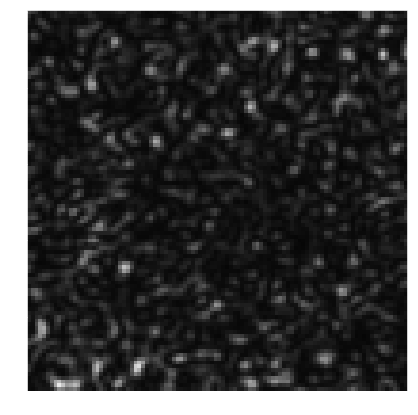

In [5]:
display_image_movie(Ic_image, frame_num=40, size=(7,7), pause_time=0.0001)

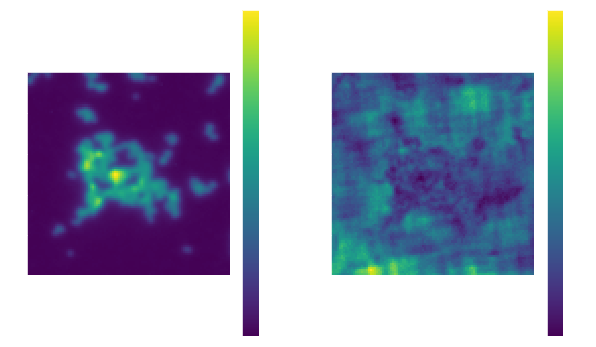

In [6]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax0 = ax[0].imshow(np.mean(I_image,axis=0))
ax1 = ax[1].imshow(np.mean(Ic_image,axis=0))
fig.colorbar(ax0,ax=ax[0])
fig.colorbar(ax1,ax=ax[1])


In [7]:
# Save data
f = open('fluorescent_data.pckl', 'wb')
pickle.dump((pscrop,lambda_f,NA_obj,I_image,Ic_image, upsamp_factor,bg), f)
f.close()